# TRABAJO FINAL BIG DATA 

In [2]:
# numpy, pandas, scipy, math, matplotlib 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn import metrics

In [4]:
DSpriv = pd.read_csv(r'C:\Users\MICHAEL\Desktop\Big Data\Módulo 5\Trabajo Final\Dataset_Privados_Libertad.csv', sep=';', header =0)

In [514]:
DSpriv.head()

,EDAD,SEXO,NIVEL_EDUC,EST_CIVIL,HIJOS,NACIONALIDAD,PROVINCIA,DELITO,CONDENA,ESTUDIO,TRABAJO,EJE_CONDICIONAL,REINCIDENTE
0,35,FEM,COL,UNI,SI,CRI,ALA,VID,117,SI,NO,FIR,NO
1,32,FEM,COL,OTR,SI,CRI,LIM,TID,168,NO,NO,DOR,NO
2,37,MAS,UNI,UNI,NO,CRI,HER,RHS,9,SI,SI,FIR,NO
3,43,MAS,ESC,SOL,SI,EXT,SJO,TID,180,SI,NO,DOR,NO
4,19,MAS,ESC,SOL,SI,CRI,ALA,TDR,78,NO,NO,TOB,SI


In [515]:
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null object
NIVEL_EDUC         101000 non-null object
EST_CIVIL          101000 non-null object
HIJOS              101000 non-null object
NACIONALIDAD       101000 non-null object
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null int64
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: int64(2), object(11)
memory usage: 10.0+ MB


In [516]:
DSpriv.head()

,EDAD,SEXO,NIVEL_EDUC,EST_CIVIL,HIJOS,NACIONALIDAD,PROVINCIA,DELITO,CONDENA,ESTUDIO,TRABAJO,EJE_CONDICIONAL,REINCIDENTE
0,35,FEM,COL,UNI,SI,CRI,ALA,VID,117,SI,NO,FIR,NO
1,32,FEM,COL,OTR,SI,CRI,LIM,TID,168,NO,NO,DOR,NO
2,37,MAS,UNI,UNI,NO,CRI,HER,RHS,9,SI,SI,FIR,NO
3,43,MAS,ESC,SOL,SI,EXT,SJO,TID,180,SI,NO,DOR,NO
4,19,MAS,ESC,SOL,SI,CRI,ALA,TDR,78,NO,NO,TOB,SI


In [517]:
DSpriv

,EDAD,SEXO,NIVEL_EDUC,EST_CIVIL,HIJOS,NACIONALIDAD,PROVINCIA,DELITO,CONDENA,ESTUDIO,TRABAJO,EJE_CONDICIONAL,REINCIDENTE
0,35,FEM,COL,UNI,SI,CRI,ALA,VID,117,SI,NO,FIR,NO
1,32,FEM,COL,OTR,SI,CRI,LIM,TID,168,NO,NO,DOR,NO
2,37,MAS,UNI,UNI,NO,CRI,HER,RHS,9,SI,SI,FIR,NO
3,43,MAS,ESC,SOL,SI,EXT,SJO,TID,180,SI,NO,DOR,NO
4,19,MAS,ESC,SOL,SI,CRI,ALA,TDR,78,NO,NO,TOB,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,55,MAS,COL,UNI,SI,CRI,CAR,FRA,36,SI,NO,RES,SI
100996,30,FEM,UNI,UNI,SI,EXT,ALA,TID,165,NO,NO,DOR,NO
100997,36,MAS,COL,UNI,SI,CRI,LIM,SEX,75,SI,NO,DOR,NO
100998,18,MAS,UNI,UNI,SI,CRI,CAR,TDR,90,NO,NO,TOB,SI


In [522]:
#Agrupación de edades en Rangos 18-30, 31-40, 41-50, 51-60, 61-70, 71-100
bins = [17,30,40,50,60,70,100]
names = ["18-30","31-40","41-50","51-60","61-70","71-100"]
DSpriv["EDAD"] = pd.cut(DSpriv["EDAD"], bins, labels = names)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null category
SEXO               101000 non-null object
NIVEL_EDUC         101000 non-null object
EST_CIVIL          101000 non-null object
HIJOS              101000 non-null object
NACIONALIDAD       101000 non-null object
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null int64
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(1), object(11)
memory usage: 9.3+ MB


In [5]:
#Agrupación de edades en Rangos 0-24, 25-48, 49-72, 73-120, 121-168, 169-216, 217-360, 361-600
bins = [0,24,48,72,120,168,216,360,600]
names = ["0-24","25-48","49-72","73-120","121-168","169-216","217-360","361-600"]
DSpriv["CONDENA"] = pd.cut(DSpriv["CONDENA"], bins, labels = names)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null object
NIVEL_EDUC         101000 non-null object
EST_CIVIL          101000 non-null object
HIJOS              101000 non-null object
NACIONALIDAD       101000 non-null object
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(1), object(11)
memory usage: 9.3+ MB


# Visualizaciones

In [7]:
sns.set_palette("colorblind")

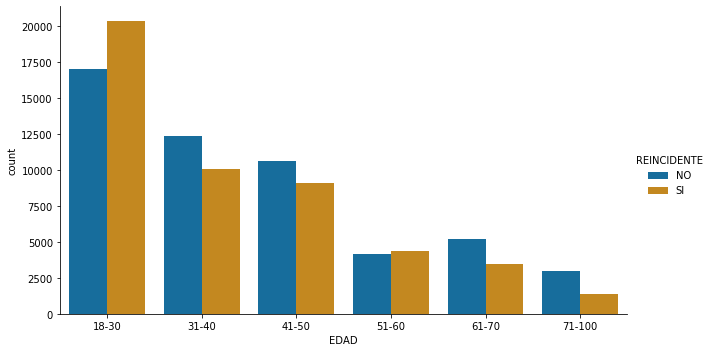

In [549]:
gEdad = sns.factorplot('EDAD', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gEdad.set_xlabels('EDAD')

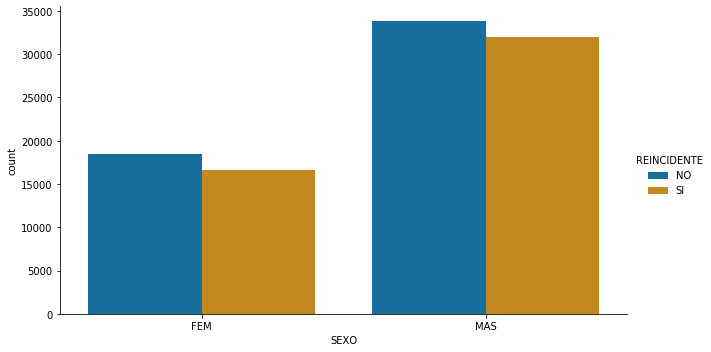

In [550]:
gSexo = sns.factorplot('SEXO', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gSexo.set_xlabels('SEXO')

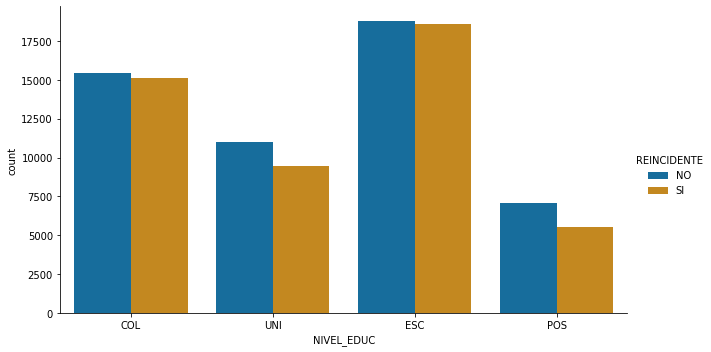

In [551]:
gEdu = sns.factorplot('NIVEL_EDUC', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gEdu.set_xlabels('NIVEL_EDUC')

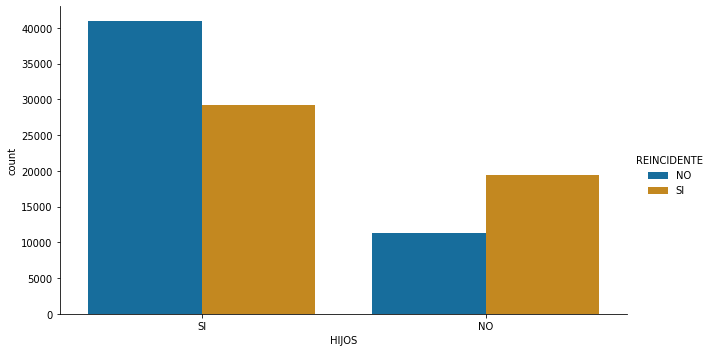

In [552]:
sns.set_palette("colorblind")
gHijos = sns.factorplot('HIJOS', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gHijos.set_xlabels('HIJOS')

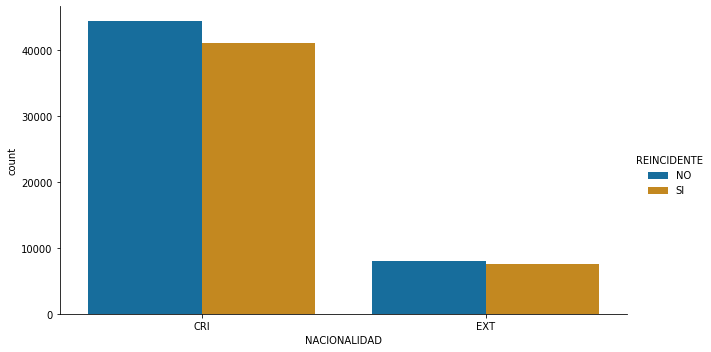

In [553]:
gNac = sns.factorplot('NACIONALIDAD', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gNac.set_xlabels('NACIONALIDAD')

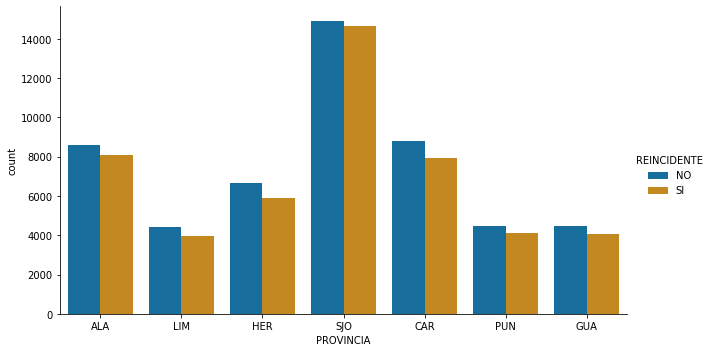

In [554]:
gProv = sns.factorplot('PROVINCIA', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gProv.set_xlabels('PROVINCIA')

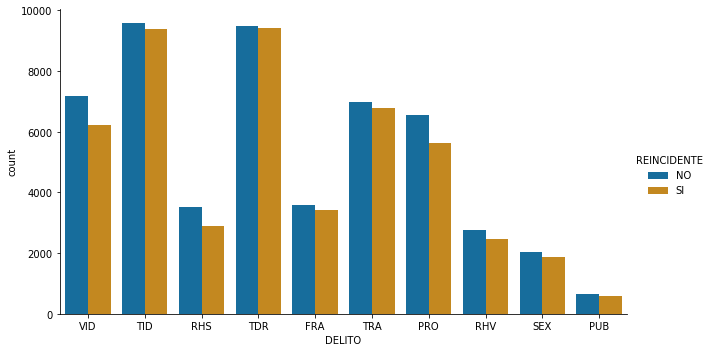

In [555]:
gDelito = sns.factorplot('DELITO', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gDelito.set_xlabels('DELITO')

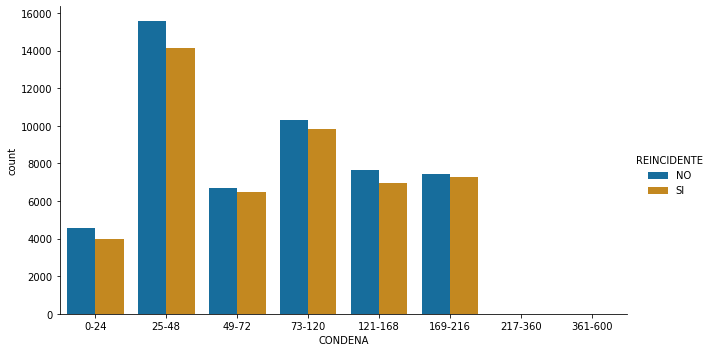

In [8]:
gCondena = sns.factorplot('CONDENA', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gCondena.set_xlabels('CONDENA')

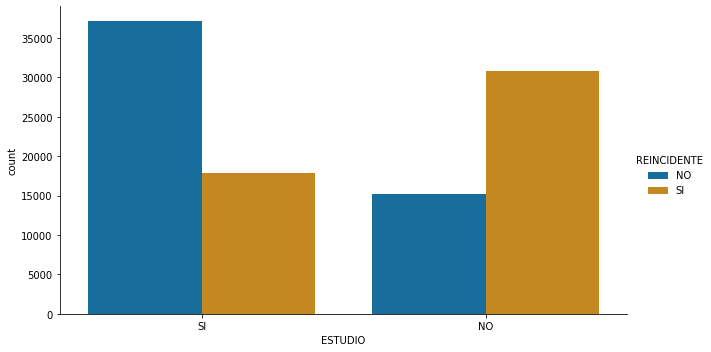

In [557]:
gEstudio = sns.factorplot('ESTUDIO', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gEstudio.set_xlabels('ESTUDIO')

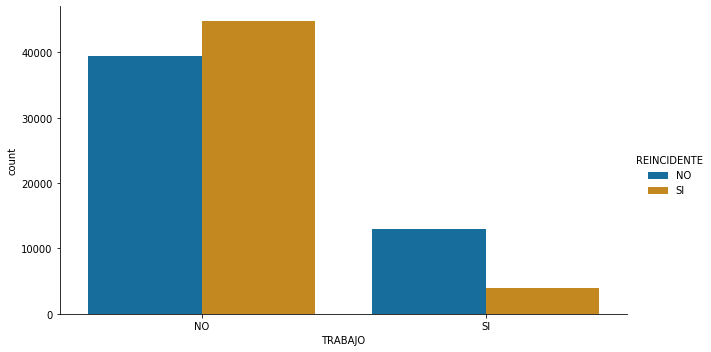

In [558]:
gTrabajo = sns.factorplot('TRABAJO', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gTrabajo.set_xlabels('TRABAJO')

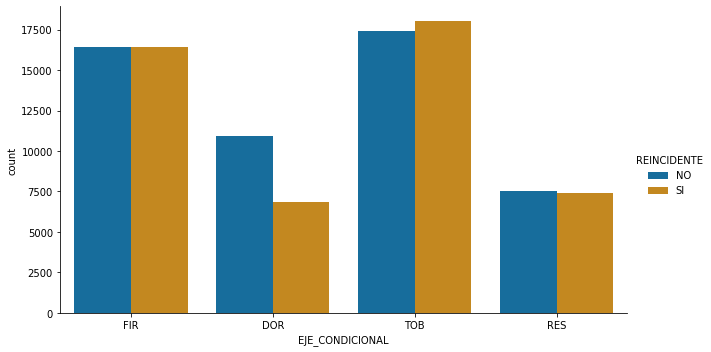

In [559]:
gCond = sns.factorplot('EJE_CONDICIONAL', data=DSpriv, hue='REINCIDENTE', kind='count', aspect=1.75)
gCond.set_xlabels('EJE_CONDICIONAL')

# TRANSFORMACIÓN DE LOS DATOS

In [560]:
DSpriv["EDAD"].replace({"18-30": 1, "31-40":2, "41-50":3, "51-60": 4, "61-70":5, "71-100":6}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null object
NIVEL_EDUC         101000 non-null object
EST_CIVIL          101000 non-null object
HIJOS              101000 non-null object
NACIONALIDAD       101000 non-null object
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(1), object(11)
memory usage: 9.3+ MB


In [561]:
DSpriv["SEXO"].replace({"MAS": 1, "FEM":2}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null object
EST_CIVIL          101000 non-null object
HIJOS              101000 non-null object
NACIONALIDAD       101000 non-null object
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(2), object(10)
memory usage: 9.3+ MB


In [562]:
DSpriv["NIVEL_EDUC"].replace({"ESC": 1, "COL":2, "UNI":3, "POS": 4}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null object
HIJOS              101000 non-null object
NACIONALIDAD       101000 non-null object
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(3), object(9)
memory usage: 9.3+ MB


In [563]:
DSpriv["EST_CIVIL"].replace({"CAS": 1, "SOL":2, "UNI":3, "OTR": 4}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null object
NACIONALIDAD       101000 non-null object
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(4), object(8)
memory usage: 9.3+ MB


In [564]:
DSpriv["HIJOS"].replace({"SI": 1, "NO":0}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null object
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(5), object(7)
memory usage: 9.3+ MB


In [565]:
DSpriv["NACIONALIDAD"].replace({"CRI": 1, "EXT":2}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null int64
PROVINCIA          101000 non-null object
DELITO             101000 non-null object
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(6), object(6)
memory usage: 9.3+ MB


In [566]:
DSpriv["PROVINCIA"].replace({"SJO": 1, "ALA":2, "CAR":3, "HER": 4, "GUA":5, "PUN":6, "LIM": 7}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null int64
PROVINCIA          101000 non-null int64
DELITO             101000 non-null object
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(7), object(5)
memory usage: 9.3+ MB


In [567]:
DSpriv["DELITO"].replace({"TDR": 1, "TID":2, "TRA":3, "VID": 4, "PRO":5, "RHS":6, "RHV": 7, "SEX":8, "FRA":9, "PUB": 10}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null int64
PROVINCIA          101000 non-null int64
DELITO             101000 non-null int64
CONDENA            101000 non-null category
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: category(1), int64(8), object(4)
memory usage: 9.3+ MB


In [568]:
DSpriv["CONDENA"].replace({"0-24":1, "25-48":2, "49-72":3, "73-120":4, "121-168":5, "169-216":6, "217-360":7, "361-600":8}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null int64
PROVINCIA          101000 non-null int64
DELITO             101000 non-null int64
CONDENA            101000 non-null object
ESTUDIO            101000 non-null object
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: int64(8), object(5)
memory usage: 10.0+ MB


In [569]:
DSpriv["ESTUDIO"].replace({"SI": 1, "NO":0}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null int64
PROVINCIA          101000 non-null int64
DELITO             101000 non-null int64
CONDENA            101000 non-null object
ESTUDIO            101000 non-null int64
TRABAJO            101000 non-null object
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: int64(9), object(4)
memory usage: 10.0+ MB


In [570]:
DSpriv["TRABAJO"].replace({"SI": 1, "NO":0}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null int64
PROVINCIA          101000 non-null int64
DELITO             101000 non-null int64
CONDENA            101000 non-null object
ESTUDIO            101000 non-null int64
TRABAJO            101000 non-null int64
EJE_CONDICIONAL    101000 non-null object
REINCIDENTE        101000 non-null object
dtypes: int64(10), object(3)
memory usage: 10.0+ MB


In [571]:
DSpriv["EJE_CONDICIONAL"].replace({"DOR": 1, "FIR":2, "TOB":3, "RES": 4}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null int64
PROVINCIA          101000 non-null int64
DELITO             101000 non-null int64
CONDENA            101000 non-null object
ESTUDIO            101000 non-null int64
TRABAJO            101000 non-null int64
EJE_CONDICIONAL    101000 non-null int64
REINCIDENTE        101000 non-null object
dtypes: int64(11), object(2)
memory usage: 10.0+ MB


In [572]:
DSpriv["REINCIDENTE"].replace({"SI": 1, "NO":0}, inplace=True)
DSpriv.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 13 columns):
EDAD               101000 non-null int64
SEXO               101000 non-null int64
NIVEL_EDUC         101000 non-null int64
EST_CIVIL          101000 non-null int64
HIJOS              101000 non-null int64
NACIONALIDAD       101000 non-null int64
PROVINCIA          101000 non-null int64
DELITO             101000 non-null int64
CONDENA            101000 non-null object
ESTUDIO            101000 non-null int64
TRABAJO            101000 non-null int64
EJE_CONDICIONAL    101000 non-null int64
REINCIDENTE        101000 non-null int64
dtypes: int64(12), object(1)
memory usage: 10.0+ MB


In [573]:
DSpriv

,EDAD,SEXO,NIVEL_EDUC,EST_CIVIL,HIJOS,NACIONALIDAD,PROVINCIA,DELITO,CONDENA,ESTUDIO,TRABAJO,EJE_CONDICIONAL,REINCIDENTE
0,2,2,2,3,1,1,2,4,4,1,0,2,0
1,2,2,2,4,1,1,7,2,5,0,0,1,0
2,2,1,3,3,0,1,4,6,1,1,1,2,0
3,3,1,1,2,1,2,1,2,6,1,0,1,0
4,1,1,1,2,1,1,2,1,4,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,4,1,2,3,1,1,3,9,2,1,0,4,1
100996,1,2,3,3,1,2,2,2,5,0,0,1,0
100997,2,1,2,3,1,1,7,8,4,1,0,1,0
100998,1,1,3,3,1,1,3,1,4,0,0,3,1


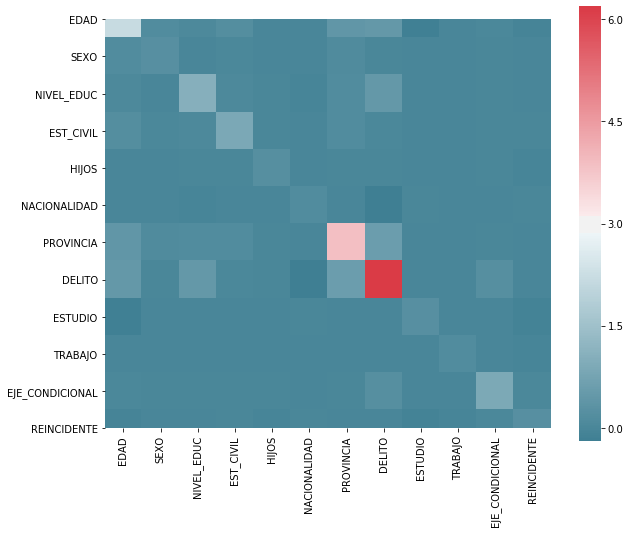

In [574]:
covMat = DSpriv.cov () 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(covMat, mask=np.zeros_like(covMat, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

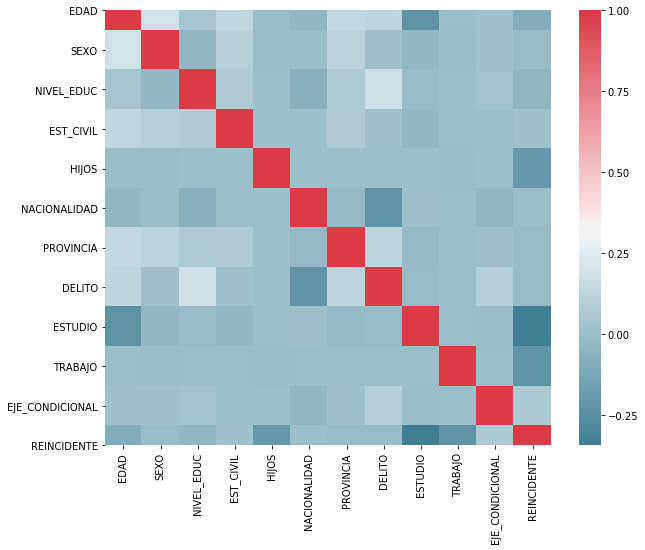

In [575]:
corrMat = DSpriv.corr () 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrMat, mask=np.zeros_like(corrMat, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=False, ax=ax)

In [345]:
#Exportar el DataFrame depurado
DSpriv.to_csv(r'C:\Users\MICHAEL\Desktop\Big Data\Módulo 5\Trabajo Final\Dataset_Depurados.csv', sep=';')

In [420]:
DsDepurado = pd.read_csv(r'C:\Users\MICHAEL\Desktop\Big Data\Módulo 5\Trabajo Final\Dataset_Depurados.csv', sep=';', header =0)

# Train and Test data

In [576]:
DsDepurado

,EDAD,SEXO,NIVEL_EDUC,EST_CIVIL,HIJOS,NACIONALIDAD,PROVINCIA,DELITO,CONDENA,ESTUDIO,TRABAJO,EJE_CONDICIONAL,REINCIDENTE
0,2,2,2,3,1,1,2,4,4,1,0,2,0
1,2,2,2,4,1,1,7,2,5,0,0,1,0
2,2,1,3,3,0,1,4,6,1,1,1,2,0
3,3,1,1,2,1,2,1,2,6,1,0,1,0
4,1,1,1,2,1,1,2,1,4,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,4,1,2,3,1,1,3,9,2,1,0,4,1
100996,1,2,3,3,1,2,2,2,5,0,0,1,0
100997,2,1,2,3,1,1,7,8,4,1,0,1,0
100998,1,1,3,3,1,1,3,1,4,0,0,3,1


In [577]:
X = DsDepurado.iloc[:, 0:12].values
y = DsDepurado.iloc[:, 12].values

In [443]:
#Dividir el set de datos en train and test: 70% y 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [444]:
Str_train = "train :" + str(len(X_train))
Str_test = "test :" + str(len(X_test))
print(Str_train)
print(Str_test)

train :70700
test :30300


In [445]:
X_train

array([[2, 1, 1, ..., 1, 0, 3],
       [2, 2, 2, ..., 0, 0, 2],
       [1, 1, 2, ..., 1, 0, 2],
       ...,
       [2, 2, 2, ..., 1, 0, 2],
       [2, 1, 2, ..., 0, 0, 3],
       [4, 1, 2, ..., 0, 0, 1]], dtype=int64)

# Modelo Random Forest

In [492]:
#Asignación de modelo Random Forest a la variable RFpriv
RFpriv = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0, min_samples_split=5)

#Entrenamiento del modelo
RFpriv.fit(X_train, y_train)

#Generar Predicciones
y_pred = RFpriv.predict(X_test)

In [493]:
#Validación con 
print (cross_val_score (RFpriv, X_train, y_train)) 

[0.76725601 0.76760962 0.76732673 0.77227723 0.76371994]


In [494]:
#Calificación de rendimiento
RFpriv.score(X_train,y_train)

0.7906364922206507

In [495]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7633333333333333


# Modelo Neural Network

In [507]:
#Asignación de modelo Random Forest a la variable RFpriv
NNpriv = MLPClassifier(alpha=0.1, hidden_layer_sizes=(6), max_iter=5000, random_state=3, solver='lbfgs')

#Entrenamiento del modelo#
NNpriv.fit(X_train, y_train)

#Generar Predicciones
y_pred = NNpriv.predict(X_test)

In [508]:
#Validación con 
print (cross_val_score (NNpriv, X_train, y_train)) 

[0.75304102 0.75148515 0.73514851 0.75636492 0.74865629]


In [509]:
#Calificación de rendimiento
NNpriv.score(X_train,y_train)

0.7534229137199434

In [510]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7524752475247525


# Modelo K Neighbors

In [454]:
#Asignación de modelo Random Forest a la variable KNpriv
KNpriv = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=10, p=1)

#Entrenamiento del modelo
KNpriv.fit(X_train, y_train)

#Generar Predicciones
y_pred = KNpriv.predict(X_test)

In [455]:
#Validación con 
print (cross_val_score (KNpriv, X_train, y_train)) 

[0.71421499 0.71760962 0.71647808 0.71612447 0.71272984]


In [456]:
#Calificación de rendimiento
KNpriv.score(X_train,y_train)

0.8126025459688826

In [457]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.715907590759076


# Ajuste RFE sobre el modelo mas eficiente

In [479]:
RFrfe = RFE(RFpriv, 7)

In [480]:
RFrfe = RFrfe.fit(X, y)
# imprimir resúmenes para la selección de atributos 
print (RFrfe.support_) 
print (RFrfe.ranking_)

[ True False  True  True  True False False False False  True  True  True]
[1 5 1 1 1 6 3 2 4 1 1 1]


In [481]:
Xrfe = DsDepurado.iloc[:,[0,2,3,4,9,10,11]].values
yrfe = DsDepurado.iloc[:, 12].values

In [482]:
#Dividir el set de datos en train and test: 70% y 30%
Xrfe_train, Xrfe_test, yrfe_train, yrfe_test = train_test_split(Xrfe, yrfe, test_size=0.3, random_state=0)

In [483]:
Str_train = "train :" + str(len(Xrfe_train))
Str_test = "test :" + str(len(Xrfe_test))
print(Str_train)
print(Str_test)

train :70700
test :30300


In [484]:
#Asignación de modelo Random Forest a la variable RFpriv
RFrfe_priv = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, min_samples_split=5)

#Entrenamiento del modelo
RFrfe_priv.fit(Xrfe_train, yrfe_train)

#Generar Predicciones
yrfe_pred = RFrfe_priv.predict(Xrfe_test)

In [485]:
#Validación con 
print (cross_val_score (RFrfe_priv, Xrfe_train, yrfe_train)) 

[0.77015559 0.77751061 0.77454031 0.77800566 0.77057992]


In [486]:
#Calificación de rendimiento
RFrfe_priv.score(Xrfe_train,yrfe_train)

0.7856435643564357

In [487]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yrfe_test, yrfe_pred))

Accuracy: 0.7677887788778878


# Matriz de confusión

Matriz de confusión
[[11349  4383]
 [ 2653 11915]]


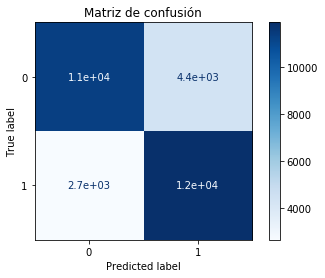

Matriz de confusión normalizada
[[0.72139588 0.27860412]
 [0.18211148 0.81788852]]


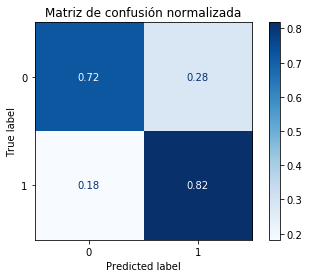

In [578]:
titles_options = [("Matriz de confusión", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(RFrfe_priv, Xrfe_test, yrfe_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()